In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import glob
files = glob.glob('../../filldata/*')
files

['../../filldata/Data_Scaler_20180510.csv',
 '../../filldata/Data_Scaler_20181127.csv']

In [3]:
# Data loading and pre-processing:
#merged_data = pd.DataFrame()

for filename in sorted(files, reverse=True):
    if not filename.startswith("Data_Scaler"): continue
    print(filename)
    dataset = pd.read_csv(os.path.join(data_dir, filename), sep=',')
    dataset = dataset.drop(columns=['ms','orb','d0','d1','d2','xs','dc01','dc02','dc12','ldc01','ldc02','ldc12'])
    print (dataset.shape)
    dataset.columns = [filename[:19],'Timestamp','Ch', 's0', 's1', 's2']
    dataset = dataset.set_index('Timestamp')
    dataset.index = pd.DatetimeIndex(dataset.index).round(freq='1s')
    #dataset.index = pd.to_datetime(dataset.index)
    #dataset.columns[1] = pd.datetime.strptime(dataset.columns[1], "%X")
    print(dataset.head())    
    #print(dataset.index)
    print(dataset.index.shape)
    #print(type(dataset)) 

In [4]:
data_dir = '../../filldata/'

In [5]:
# Data loading and pre-processing:
dataset_train = pd.read_csv(os.path.join(data_dir, 'Data_Scaler_20180510.csv'), sep=',',infer_datetime_format=True)
dataset_train = dataset_train.drop(columns=['ms','orb','d0','d1','d2','xs','dc01','dc02','dc12','ldc01','ldc02','ldc12'])
dataset_train.columns = [filename[:19],'Timestamp','Ch', 's0', 's1', 's2']
dataset_train = dataset_train.set_index('Timestamp')
#dataset.index = pd.to_datetime(dataset.index)
dataset_train.index = pd.DatetimeIndex(dataset_train.index).round(freq='1s')#.round(freq='ms')
print(dataset_train.head())
    
dataset_test = pd.read_csv(os.path.join(data_dir, 'Data_Scaler_20181127.csv'), sep=',',infer_datetime_format=True)
dataset_test = dataset_test.drop(columns=['ms','orb','d0','d1','d2','xs','dc01','dc02','dc12','ldc01','ldc02','ldc12'])
dataset_test.columns = [filename[:19],'Timestamp','Ch', 's0', 's1', 's2']
dataset_test = dataset_test.set_index('Timestamp')
#dataset.index = pd.to_datetime(dataset.index)
dataset_test.index = pd.DatetimeIndex(dataset_test.index).round(freq='1s')
print(dataset_test.head())

#dataset_train.plot(figsize = (12,6))

                           ../../filldata/Data  Ch  s0  s1  s2
Timestamp                                                     
2018-05-10 20:54:19+00:00                    0   0   0   0   0
2018-05-10 20:54:19+00:00                    1   1   0   0   0
2018-05-10 20:54:19+00:00                    2   2   0   0   0
2018-05-10 20:54:19+00:00                    3   3   0   0   0
2018-05-10 20:54:19+00:00                    4   4   0   0   0
                           ../../filldata/Data  Ch  s0  s1  s2
Timestamp                                                     
2018-11-27 22:50:15+00:00                    0   0   0  24  26
2018-11-27 22:50:15+00:00                    1   1  57  39  41
2018-11-27 22:50:15+00:00                    2   2  45  36  32
2018-11-27 22:50:15+00:00                    3   3  19  12  22
2018-11-27 22:50:15+00:00                    4   4   8  18   0


In [6]:
# Data loading and pre-processing:
dataset_test = dataset_test.dropna()
dataset_train = dataset_train.dropna()
dataset_train[dataset_train.isna().any(axis=1)] 
dataset_test[dataset_test.isna().any(axis=1)] 
dataset_train = dataset_train.drop(dataset_train.columns[0], axis=1)
dataset_test = dataset_test.drop(dataset_test.columns[0], axis=1)
display(dataset_train)
display(dataset_test)

,Ch,s0,s1,s2
Timestamp,,,,
2018-05-10 20:54:19+00:00,0,0,0,0
2018-05-10 20:54:19+00:00,1,0,0,0
2018-05-10 20:54:19+00:00,2,0,0,0
2018-05-10 20:54:19+00:00,3,0,0,0
2018-05-10 20:54:19+00:00,4,0,0,0
...,...,...,...,...
2018-05-11 10:22:55+00:00,11,585,596,766
2018-05-11 10:22:55+00:00,12,582,634,708
2018-05-11 10:22:55+00:00,13,540,589,665


,Ch,s0,s1,s2
Timestamp,,,,
2018-11-27 22:50:15+00:00,0,0,24,26
2018-11-27 22:50:15+00:00,1,57,39,41
2018-11-27 22:50:15+00:00,2,45,36,32
2018-11-27 22:50:15+00:00,3,19,12,22
2018-11-27 22:50:15+00:00,4,8,18,0
...,...,...,...,...
2018-11-28 07:03:41+00:00,11,0,17,19
2018-11-28 07:03:41+00:00,12,12,18,12
2018-11-28 07:03:41+00:00,13,11,14,13


In [7]:
# Concatenate all data together
#df0 = pd.DataFrame(columns=dataset_train.columns[2:2])
#df0 = np.empty(shape = (1065584,1))
#df0 = pd.DataFrame(columns=range(1))
df0 = pd.DataFrame(index=dataset_train.index,columns=range(1))
df0['Values'] = dataset_train[['s0']].values
df0['Timestamp'] = dataset_train.index
df0.set_index('Timestamp')
first_column = df0.pop('Timestamp')
df0.insert(0, 'Timestamp', first_column)
df0 = df0.drop(df0.columns[1], axis=1)
df1 = pd.DataFrame(index=dataset_train.index,columns=range(1))
df1[['Values']] = dataset_train[['s1']].values
df1['Timestamp'] = dataset_train.index
df1.set_index('Timestamp')
first_column = df1.pop('Timestamp')
df1.insert(0, 'Timestamp', first_column)
#display(df1)
df2 = pd.DataFrame(index=dataset_train.index,columns=range(1))
df2[['Values']] = dataset_train[['s2']].values
df2['Timestamp'] = dataset_train.index
df2.set_index('Timestamp')
first_column = df2.pop('Timestamp')
df2.insert(0, 'Timestamp', first_column)
#display(df2)
frames = [df0,df1,df2]
result = pd.concat(frames)#, join = 'inner')
result = result.set_index('Timestamp')
result.drop(result.columns[1], axis=1, inplace=True)
display(result)

# Concatenate all data together
dfa = pd.DataFrame(index=dataset_test.index,columns=range(1))
dfa[['Values']] = dataset_test[['s0']].values
dfa['Timestamp'] = dataset_test.index
dfa.set_index('Timestamp')
first_column = dfa.pop('Timestamp')
dfa.insert(0, 'Timestamp', first_column)
dfa = dfa.drop(dfa.columns[0], axis=1)
dfa = dfa.drop(dfa.columns[0], axis=1)
display(dfa)
dfb = pd.DataFrame(index=dataset_test.index,columns=range(1))
dfb[['Values']] = dataset_test[['s1']].values
dfb['Timestamp'] = dataset_test.index
dfb.set_index('Timestamp')
first_column = dfb.pop('Timestamp')
dfb.insert(0, 'Timestamp', first_column)
dfb = dfb.drop(dfb.columns[0], axis=1)
dfb = dfb.drop(dfb.columns[0], axis=1)
display(dfa)
dfc = pd.DataFrame(index=dataset_test.index,columns=range(1))
dfc[['Values']] = dataset_test[['s2']].values
dfc['Timestamp'] = dataset_test.index
dfc.set_index('Timestamp')
first_column = dfc.pop('Timestamp')
dfc.insert(0, 'Timestamp', first_column)
dfc = dfc.drop(dfc.columns[0], axis=1)
dfc = dfc.drop(dfc.columns[0], axis=1)
display(dfa)
frames = [dfa,dfb,dfc]
result2 = pd.concat(frames)#, join = 'inner')
#result2 = result2.set_index('Timestamp')
#result2.drop(result2.columns[1], axis=1, inplace=True)
display(result2)

,Values
Timestamp,
2018-05-10 20:54:19+00:00,0
2018-05-10 20:54:19+00:00,0
2018-05-10 20:54:19+00:00,0
2018-05-10 20:54:19+00:00,0
2018-05-10 20:54:19+00:00,0
...,...
2018-05-11 10:22:55+00:00,766
2018-05-11 10:22:55+00:00,708
2018-05-11 10:22:55+00:00,665


,Values
Timestamp,
2018-11-27 22:50:15+00:00,0
2018-11-27 22:50:15+00:00,57
2018-11-27 22:50:15+00:00,45
2018-11-27 22:50:15+00:00,19
2018-11-27 22:50:15+00:00,8
...,...
2018-11-28 07:03:41+00:00,0
2018-11-28 07:03:41+00:00,12
2018-11-28 07:03:41+00:00,11


,Values
Timestamp,
2018-11-27 22:50:15+00:00,0
2018-11-27 22:50:15+00:00,57
2018-11-27 22:50:15+00:00,45
2018-11-27 22:50:15+00:00,19
2018-11-27 22:50:15+00:00,8
...,...
2018-11-28 07:03:41+00:00,0
2018-11-28 07:03:41+00:00,12
2018-11-28 07:03:41+00:00,11


,Values
Timestamp,
2018-11-27 22:50:15+00:00,0
2018-11-27 22:50:15+00:00,57
2018-11-27 22:50:15+00:00,45
2018-11-27 22:50:15+00:00,19
2018-11-27 22:50:15+00:00,8
...,...
2018-11-28 07:03:41+00:00,0
2018-11-28 07:03:41+00:00,12
2018-11-28 07:03:41+00:00,11


,Values
Timestamp,
2018-11-27 22:50:15+00:00,0
2018-11-27 22:50:15+00:00,57
2018-11-27 22:50:15+00:00,45
2018-11-27 22:50:15+00:00,19
2018-11-27 22:50:15+00:00,8
...,...
2018-11-28 07:03:41+00:00,19
2018-11-28 07:03:41+00:00,12
2018-11-28 07:03:41+00:00,13


In [8]:
from sklearn import preprocessing

# Normalize data
scaler = preprocessing.MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(result), 
                              columns=result.columns, 
                              index=result.index)
# Random shuffle training data
X_train.sample(frac=1)

X_test = pd.DataFrame(scaler.transform(result2), 
                             columns=result2.columns, 
                             index=result2.index)

In [9]:
display(X_train)
display(X_test)
column = X_train["Values"]
max_value = column.max()
print(max_value)

,Values
Timestamp,
2018-05-10 20:54:19+00:00,0.000000
2018-05-10 20:54:19+00:00,0.000000
2018-05-10 20:54:19+00:00,0.000000
2018-05-10 20:54:19+00:00,0.000000
2018-05-10 20:54:19+00:00,0.000000
...,...
2018-05-11 10:22:55+00:00,0.000171
2018-05-11 10:22:55+00:00,0.000158
2018-05-11 10:22:55+00:00,0.000149


,Values
Timestamp,
2018-11-27 22:50:15+00:00,0.000000
2018-11-27 22:50:15+00:00,0.000013
2018-11-27 22:50:15+00:00,0.000010
2018-11-27 22:50:15+00:00,0.000004
2018-11-27 22:50:15+00:00,0.000002
...,...
2018-11-28 07:03:41+00:00,0.000004
2018-11-28 07:03:41+00:00,0.000003
2018-11-28 07:03:41+00:00,0.000003


1.0


In [10]:
#Define the autoencoder model
#Since we're dealing with numeric values we can use only Dense layers.

from sklearn import metrics
import numpy as np
import pandas as pd
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Input, Dropout 
from keras.models import Model, Sequential, load_model
from keras import regularizers
from keras.models import model_from_json


tensorflow.random.set_seed(10)
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu', kernel_initializer='glorot_uniform',
                kernel_regularizer=regularizers.l1(0.0)))
model.add(Dense(3, activation='relu',kernel_initializer='glorot_uniform'))
model.add(Dense(10, activation='sigmoid',kernel_initializer='glorot_uniform')) #sigmoid at last level, batch size=100, threshold=0.0017
#model.add(Dense(10, activation='relu',kernel_initializer='glorot_uniform'))  #relu at last level, batch size=50, threshold=0.00078
model.add(Dense(X_train.shape[1],kernel_initializer='glorot_uniform')) 
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

2022-08-09 09:54:17.101369: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cvmfs/sft-nightlies.cern.ch/lcg/latest/MCGenerators/thepeg/2.2.3-bb611/x86_64-centos7-gcc11-opt/lib/ThePEG:/cvmfs/sft-nightlies.cern.ch/lcg/latest/MCGenerators/herwig++/7.2.3-5f56d/x86_64-centos7-gcc11-opt/lib/Herwig:/cvmfs/sft-nightlies.cern.ch/lcg/views/dev4/Tue/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/jaxlib/mlir/_mlir_libs:/cvmfs/sft-nightlies.cern.ch/lcg/views/dev4/Tue/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/torch/lib:/cvmfs/sft-nightlies.cern.ch/lcg/views/dev4/Tue/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/onnxruntime/capi/:/cvmfs/sft-nightlies.cern.ch/lcg/views/dev4/Tue/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/tensorflow:/cvmfs/sft-nightlies.cern.ch/lcg/views/dev4/Tue/x86_64-centos7-gcc11

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 3)                 33        
                                                                 
 dense_2 (Dense)             (None, 10)                40        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 104
Trainable params: 104
Non-trainable params: 0
_________________________________________________________________


2022-08-09 09:54:37.850938: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-08-09 09:54:37.851030: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (lxplus761.cern.ch): /proc/driver/nvidia/version does not exist
2022-08-09 09:54:37.852523: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
#Fit the model
history=model.fit(np.array(X_train),np.array(X_train),epochs=100,
                  validation_split=0.20,
                  batch_size=100,shuffle=True,
                  verbose = 1)

Epoch 1/100
25575/25575 [==============================] - 32s 1ms/step - loss: 0.0015 - val_loss: 1.3414e-05
Epoch 2/100
25575/25575 [==============================] - 32s 1ms/step - loss: 8.2878e-07 - val_loss: 2.2927e-06
Epoch 3/100
25575/25575 [==============================] - 33s 1ms/step - loss: 7.2582e-07 - val_loss: 2.0670e-06
Epoch 4/100
25575/25575 [==============================] - 33s 1ms/step - loss: 6.6865e-07 - val_loss: 1.8790e-07
Epoch 5/100
25575/25575 [==============================] - 33s 1ms/step - loss: 6.3377e-07 - val_loss: 3.7675e-06
Epoch 6/100
25575/25575 [==============================] - 31s 1ms/step - loss: 6.0261e-07 - val_loss: 7.2365e-07
Epoch 7/100
25575/25575 [==============================] - 31s 1ms/step - loss: 5.7454e-07 - val_loss: 2.0611e-06
Epoch 8/100
25575/25575 [==============================] - 31s 1ms/step - loss: 5.5042e-07 - val_loss: 6.0319e-06
Epoch 9/100
25575/25575 [==============================] - 33s 1ms/step - loss: 5.3358e-07 -

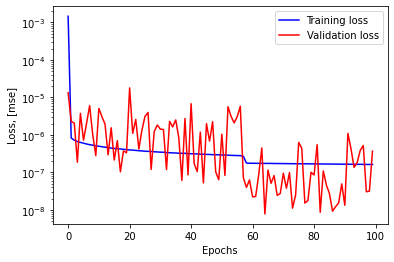

In [12]:
# Visualize training/validation loss:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],
         'b',
         label='Training loss')
plt.plot(history.history['val_loss'],
         'r',
         label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')
#plt.ylim([0,.1])
plt.yscale('log')
plt.show()


In [13]:
#Compute RMSE
pred = model.predict(X_train)
score1 = np.sqrt(metrics.mean_squared_error(pred,X_train))

pred = model.predict(X_test)
score2 = np.sqrt(metrics.mean_squared_error(pred,X_test))


print(f"Insample Good Score (RMSE): {score1}".format(score1))
print(f"Test Samples Good Score (RMSE): {score2}")

2022-08-09 10:47:58.135054: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 25574016 exceeds 10% of free system memory.
2022-08-09 10:47:58.165519: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 25574016 exceeds 10% of free system memory.
2022-08-09 10:47:58.318625: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 25574016 exceeds 10% of free system memory.


Insample Good Score (RMSE): 0.0006311209741760661
Test Samples Good Score (RMSE): 0.00032806442371187584


In [14]:
# Setting threshold

X_pred = model.predict(np.array(X_test))
X_pred = pd.DataFrame(X_pred, 
                      columns=X_test.columns)
X_pred.index = X_test.index

scored = pd.DataFrame(index=X_test.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
scored['Threshold'] = 0.0017 #sigmoid+batch_size=100
#scored['Threshold'] = 0.00078 #relu+batch_size=50
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored.head()

,Loss_mae,Threshold,Anomaly
Timestamp,,,
2018-11-27 22:50:15+00:00,0.000361,0.0017,False
2018-11-27 22:50:15+00:00,0.000357,0.0017,False
2018-11-27 22:50:15+00:00,0.000358,0.0017,False
2018-11-27 22:50:15+00:00,0.000360,0.0017,False
2018-11-27 22:50:15+00:00,0.000361,0.0017,False


In [15]:
# all train data

X_pred_train = model.predict(np.array(X_train))
X_pred_train = pd.DataFrame(X_pred_train, 
                      columns=X_train.columns)
X_pred_train.index = X_train.index

scored_train = pd.DataFrame(index=X_train.index)
scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-X_train), axis = 1)
scored_train['Threshold'] = 0.0017  #sigmoid+batch_size=100 #scored_train['Threshold'] = 0.00078 relu+batch_size=50
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']
scored_all = pd.concat([scored_train, scored])

2022-08-09 10:50:32.548554: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 25574016 exceeds 10% of free system memory.
2022-08-09 10:50:32.602141: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 25574016 exceeds 10% of free system memory.


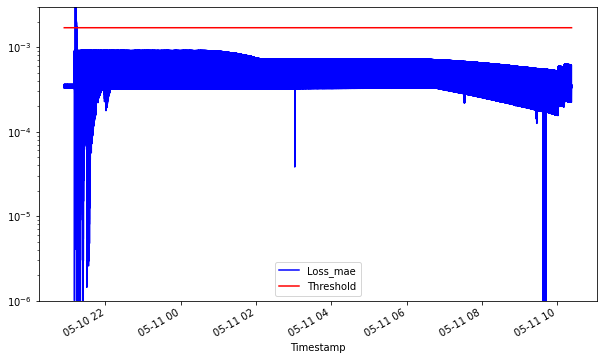

In [16]:
scored_train.plot(logy=True,  figsize = (10,6), ylim = [1e-6,3e-3], color = ['blue','red'])
plt.show()

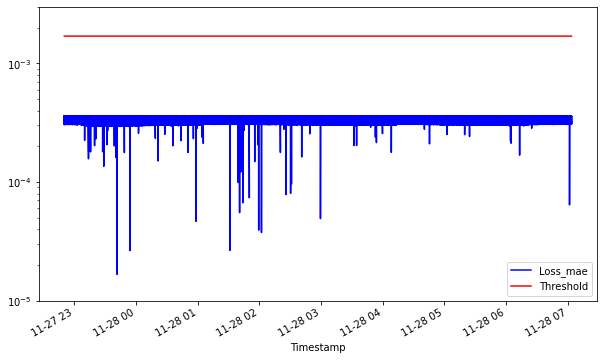

In [17]:
scored.plot(logy=True,  figsize = (10,6), ylim = [1e-5,3e-3,], color = ['blue','red'])
plt.show()

/cvmfs/sft-nightlies.cern.ch/lcg/views/dev4/Tue/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


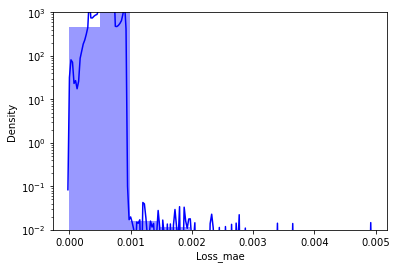

In [18]:
# Distribution of loss function in the training set
import seaborn as sns
X_pred = model.predict(np.array(X_train))
X_pred = pd.DataFrame(X_pred, 
                      columns=X_train.columns)
X_pred.index = X_train.index

scored = pd.DataFrame(index=X_train.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis = 1)
#display(scored)
plt.figure()
sns.distplot(scored['Loss_mae'],
             bins = 10, 
             kde= True,
            color = 'blue');
#plt.xlim([0.0,.5])
plt.yscale('log')
plt.ylim(1e-2, 1000)
plt.show()

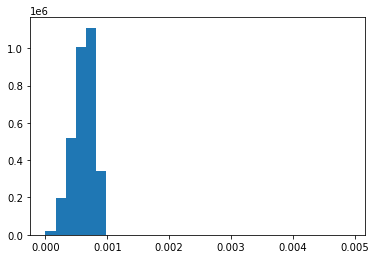

In [19]:
trainPredict = model.predict(X_train)
trainMAE = np.mean(np.abs(trainPredict - X_train), axis=1)
plt.hist(trainMAE, bins=30)
threshold = 1.2  #or Define 90% value of max as threshold.
plt.show()

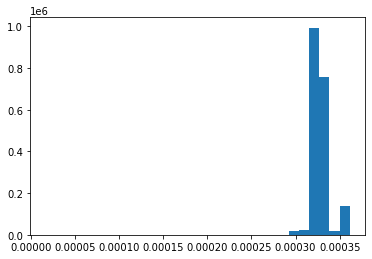

In [20]:
testPredict = model.predict(X_test)
testMAE = np.mean(np.abs(testPredict - X_test), axis=1)
plt.hist(testMAE, bins=30)
plt.show()

In [21]:
#Capture all details in a DataFrame for easy plotting-test
anomaly_df = pd.DataFrame(X_test[seq_size:])
anomaly_df['testMAE'] = testMAE
anomaly_df['Threshold'] = threshold
anomaly_df['anomaly'] = anomaly_df['testMAE'] > anomaly_df['Threshold']
plt.show()

NameError: name 'seq_size' is not defined

In [ ]:
display(anomaly_df)

In [ ]:
#Plot testMAE vs max_trainMAE
anomaly_df['testMAE'].plot()
plt.savefig("dummy7.png")
plt.close()
anomaly_df['Threshold'].plot()
plt.show()

In [ ]:
#Prepare to plot anomalies-Test 
anomalies = anomaly_df.loc[anomaly_df['anomaly'] == True]
anomaly_df=anomaly_df.drop(anomaly_df.columns[[1]], axis=1)
anomalies=anomalies.drop(anomalies.columns[[1]], axis=1)
anomaly_df=anomaly_df.drop(anomaly_df.columns[[2]], axis=1)
anomalies=anomalies.drop(anomalies.columns[[2]], axis=1)
anomaly_df=anomaly_df.drop(anomaly_df.columns[[1]], axis=1)
anomalies['Timestamp'] = anomalies.index
#Plot anomalies-Test
ax=anomaly_df.plot()
anomalies.plot.scatter(ax=ax,x='Timestamp',y='s1', color='r')
plt.show()

In [ ]:
#Capture all details in a DataFrame for easy plotting-train
anomaly = pd.DataFrame(X_train[seq_size:])
anomaly['trainMAE'] = trainMAE
anomaly['Threshold'] = threshold
anomaly['anomaly'] = anomaly['trainMAE'] > anomaly['Threshold']
plt.show()

In [ ]:
#Plot anomalies-Train
anomalies2 = anomaly.loc[anomaly['anomaly'] == True]
anomalies2['Timestamp'] = anomalies2.index
ax=X_train.plot()
anomalies2.plot.scatter(ax=ax, x= 'Timestamp', y='s1', color= 'r')
plt.show()